# 📋 Звіт до Лабораторної роботи №6
## Дослідження та візуалізація даних за допомогою Pandas

[cite_start]**Мета роботи:** отримати базові навики використання бібліотеки Pandas для дослідження та візуалізації даних. [cite: 3]
**Варіант:** №2. [cite_start]Дослідження втрат танків. [cite: 16]

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io

# Цей код знову відкриє вікно для вибору файлу
print("КРОК 1/2: Будь ласка, ЗНОВУ завантажте файл 'russia_losses_equipment.csv':")
uploaded = files.upload()

# Оскільки файл вже завантажено, цей код його просто зчитує
file_name = list(uploaded.keys())[0]

# Читання файлу та створення DataFrame
df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))

# Підготовка даних: перетворення дати та встановлення її як індексу
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

print(f"\nДані '{file_name}' успішно завантажено та підготовлено!")
print(df.head())

КРОК 1/2: Будь ласка, ЗНОВУ завантажте файл 'russia_losses_equipment.csv':


Saving russia_losses_equipment.csv to russia_losses_equipment (1).csv

Дані 'russia_losses_equipment (1).csv' успішно завантажено та підготовлено!
             day  aircraft  helicopter   tank    APC  field artillery   MRL  \
date                                                                          
2025-11-23  1369       428         347  11363  23615            34585  1549   
2025-11-22  1368       428         347  11361  23607            34559  1547   
2025-11-21  1367       428         347  11357  23600            34550  1546   
2025-11-20  1366       428         347  11357  23597            34530  1546   
2025-11-19  1365       428         347  11356  23595            34511  1546   

            military auto  fuel tank  drone  naval ship  \
date                                                      
2025-11-23            NaN        NaN  83338          28   
2025-11-22            NaN        NaN  82842          28   
2025-11-21            NaN        NaN  82620          28   
2025

In [14]:

# Завдання 1. Знайдіть добові втрати танків.
# Обчислюємо різницю (diff) між кумулятивними значеннями.
daily_tank_losses = df['tank'].diff().dropna().astype(int)

print("Добові втрати танків (перші 5 дат):")
print(daily_tank_losses.head())

Добові втрати танків (перші 5 дат):
date
2025-11-22   -2
2025-11-21   -4
2025-11-20    0
2025-11-19   -1
2025-11-18   -1
Name: tank, dtype: int64


In [15]:
# Завдання 2. Знайдіть 4 найбільші добові втрати танків і визначте дати.
top_4_losses = daily_tank_losses.nlargest(4)

print("4 найбільші добові втрати танків та дати:")
print(top_4_losses)

4 найбільші добові втрати танків та дати:
date
2023-05-27    2
2025-11-20    0
2025-11-17    0
2025-11-13    0
Name: tank, dtype: int64


In [19]:
# Завдання 3. Визначте, скільки танків було знищено навесні 2024 року.
start_date_2024 = '2024-03-01'
end_date_2024 = '2024-05-31'

print("\nВтрати танків навесні 2024 року:")

try:
    # Спочатку перевіряємо, чи є дані для всього періоду.
    # Якщо кінцева дата (end_date_2024) не існує, Pandas видасть помилку KeyError.
    tank_spring_2024_data = df.loc[start_date_2024:end_date_2024, 'tank']

    if tank_spring_2024_data.empty or len(tank_spring_2024_data) < 2:
        print("Дані за вказаний період (Весна 2024) відсутні або недостатні.")
    else:
        # Розраховуємо різницю
        tank_total_spring_2024 = tank_spring_2024_data.iloc[-1] - tank_spring_2024_data.iloc[0]
        print(f"Втрати танків навесні 2024 року: {tank_total_spring_2024}")

except KeyError as e:
    # Обробляємо помилку, якщо кінцева дата не знайдена в індексі
    max_date = df.index.max().strftime('%Y-%m-%d')
    print(f"Помилка: Набір даних містить інформацію лише до {max_date}.")
    print(f"Обчислення втрат за Весну 2024 неможливе.")


Втрати танків навесні 2024 року:
Помилка: Набір даних містить інформацію лише до 2025-11-23.
Обчислення втрат за Весну 2024 неможливе.


In [17]:
# Завдання 4. Знайдіть середнє значення знищених танків за останні 100 днів війни.
# Використовуємо добові втрати, розраховані в завданні 1
last_100_days_losses = daily_tank_losses.tail(100)

average_tank_loss = last_100_days_losses.mean()

print(f"Середнє значення добових втрат танків за останні 100 днів: {average_tank_loss:.2f} одиниць")

Середнє значення добових втрат танків за останні 100 днів: -13.01 одиниць


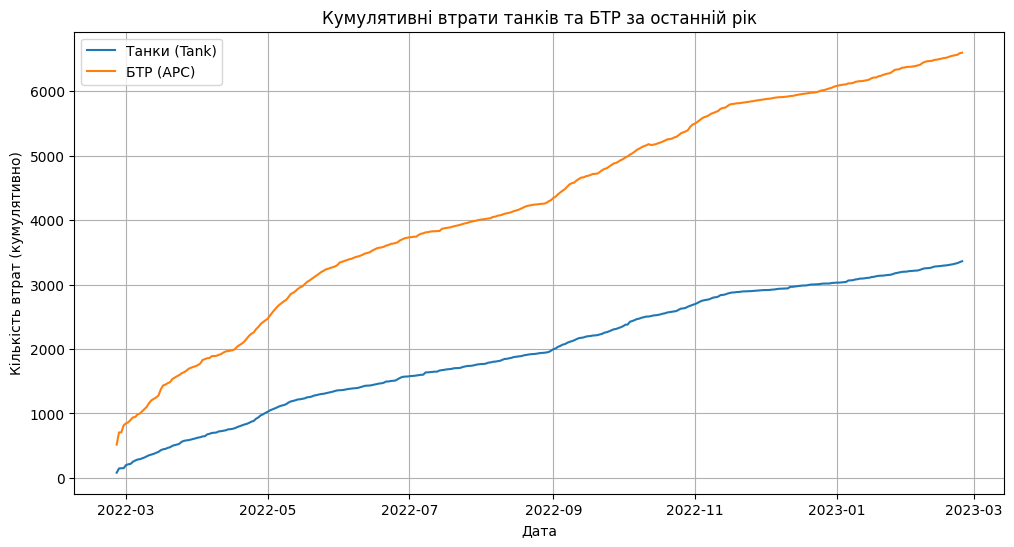

In [22]:
# Завдання 5. Створіть графік втрат танків та БТР (АРС) за минулий рік (останні 365 днів).
# Використовуємо ймовірну коректну назву колонки для БТР: 'APC'
last_year_data = df.tail(365)

plt.figure(figsize=(12, 6))

# Танки
plt.plot(last_year_data.index, last_year_data['tank'], label='Танки (Tank)')

# БТР (АРС). Тут назву колонки змінено на 'APC'
plt.plot(last_year_data.index, last_year_data['APC'], label='БТР (APC)')

plt.title('Кумулятивні втрати танків та БТР за останній рік')
plt.xlabel('Дата')
plt.ylabel('Кількість втрат (кумулятивно)')
plt.legend()
plt.grid(True)
plt.show()